In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
nPosts = 2    # spin model: nPosts=2/3 => total_agents = 6/60; temperature = 0.05/0.01;
df = pd.read_csv("/Users/vivekhsridhar/Documents/Code/decision_geometry/decision_geometry/output/geometry.csv")
df.head()

,replicate,time,x,y,angular_disagreement,relative_direction,dir_x,dir_y,sim_id
0,0,10,9.42321,499.215,61.0976,26.6624,0.488322,-0.032499,0.0
1,0,20,14.58500,498.855,61.7142,28.1385,0.529531,-0.024074,0.0
2,0,30,20.38650,498.565,62.4208,27.9944,0.599002,-0.032130,0.0
3,0,40,26.49390,498.253,63.1805,28.4806,0.624977,-0.031999,0.0
4,0,50,32.85890,497.923,63.9900,28.0888,0.636449,-0.041072,0.0


In [167]:
xs = df[' x'] / 100
ys = (df[' y'] - 500) / 100

if nPosts == 2:
    post0_x = 5.0*np.cos(np.pi/6)
    post0_y = -5.0*np.sin(np.pi/6)

    post1_x = 5.0*np.cos(np.pi/6)
    post1_y = 5.0*np.sin(np.pi/6)
else:
    post0_x = 5.0*np.cos(2*np.pi/9)
    post0_y = -5.0*np.sin(2*np.pi/9)

    post1_x = 5.0
    post1_y = 0.0
    
    post2_x = 5.0*np.cos(2*np.pi/9)
    post2_y = 5.0*np.sin(2*np.pi/9)

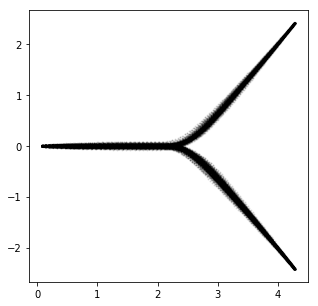

In [168]:
plt.figure(figsize=(5,5))
plt.scatter(xs, ys, c='black', s=1, alpha=0.1)
# plt.savefig('/Users/vivekhsridhar/Documents/Code/Python/fly-matrix/figures/trajectories_' + str(nPosts) + '_simulation.png', format='png', dpi=300)

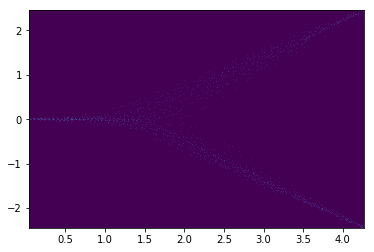

In [5]:
nbins = 500
h,xedge,yedge,image = plt.hist2d(xs,ys, bins=nbins, normed=True)

if nPosts == 2:
    img = np.flipud(np.rot90(cv2.GaussianBlur(h,(101,101),0)))
else:
    img = np.flipud(np.rot90(cv2.GaussianBlur(h,(101,101),0)))

In [6]:
for i in range(0,nbins):
    max_val = np.max(img[:,i])
    img[:,i] = img[:,i]/max_val

In [7]:
xs=[]
ys=[]
import scipy.signal

if nPosts == 2:
    for i in range(1,nbins):
        a = scipy.signal.find_peaks(img[:,i], height=0.5)[0]
        for j in range(0,len(a)):
            xs.append(i*post0_x/nbins)
            ys.append(a[j]*(post0_y-post1_y)/nbins + post1_y)
else:
    for i in range(1,nbins):
        a = scipy.signal.find_peaks(img[:,i], height=0.5)[0]
        for j in range(0,len(a)):
            xs.append(i*post1_x/nbins)
            ys.append(a[j]*(post0_y-post2_y)/nbins + post2_y)

In [8]:
def get_duplicates(x): 
    _size = len(x) 
    repeated = [] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in repeated: 
                repeated.append(x[i]) 
    return repeated 

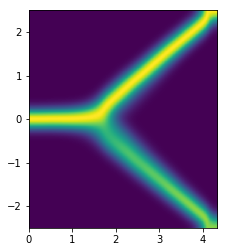

In [9]:
if nPosts == 2:
    bifurcation_x = np.min(np.where(xs == np.min(get_duplicates(xs))))-1
    plt.imshow(img, extent=[0,post1_x,post0_y,post1_y])
else:
    plt.imshow(img, extent=[0,post1_x,post0_y,post2_y])
#plt.scatter(xs,ys, s=1, c='black')

plt.savefig('/Users/vivekhsridhar/Documents/Code/Python/fly-matrix/figures/' + str(nPosts) + '_post_bifurcation_tracks_simulation.png', format='png', dpi=300)

In [10]:
bifurcation_pt = post1_x*bifurcation_x/nbins,ys[bifurcation_x]

vec0 = post0_x-bifurcation_pt[0], post0_y-bifurcation_pt[1]
if nPosts == 2:
    vec1 = post1_x-bifurcation_pt[0], post1_y-bifurcation_pt[1] 
else:
    vec1 = post2_x-bifurcation_pt[0], post2_y-bifurcation_pt[1]

vec0 = vec0 / np.linalg.norm(vec0)
vec1 = vec1 / np.linalg.norm(vec1)

In [11]:
np.arccos(vec0.dot(vec1))*180/np.pi

88.46294882215685

In [12]:
app_ang = df[' theta']
direc = np.arctan2(df[' dir_y'],df[' dir_x'])

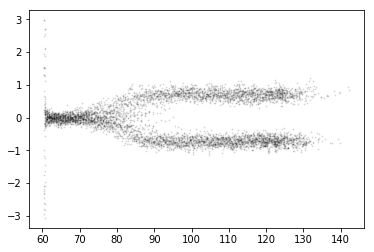

In [13]:
plt.scatter(app_ang, direc, c='black', s=1, alpha=0.1)

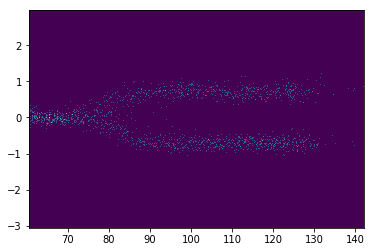

In [14]:
nbins = 500
h,xedge,yedge,image = plt.hist2d(app_ang,direc, bins=nbins, normed=True)
img = np.flipud(np.rot90(cv2.GaussianBlur(h,(301,151),0)))

In [15]:
for i in range(0,nbins):
    max_val = np.max(img[:,i])
    img[:,i] = img[:,i]/max_val

In [16]:
angs=[]
dirs=[]
import scipy.signal
for i in range(5,nbins):
    a = scipy.signal.find_peaks(img[:,i], height=0.1)[0]
    for j in range(0,len(a)):
        angs.append(i*(180-60)/nbins + 60)
        dirs.append(a[j]*2*180/nbins - 180)

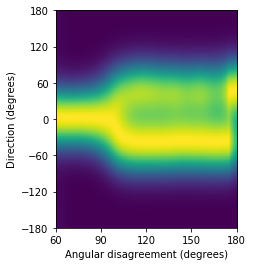

In [17]:
bifurcation_x = np.min(np.where(angs == np.min(get_duplicates(angs))))-1

plt.imshow(np.flipud(img), extent=[60,180,-180,180], aspect=0.4)
plt.xticks([60,90,120,150,180])
plt.yticks([-180,-120,-60,0,60,120,180])
plt.xlabel('Angular disagreement (degrees)')
plt.ylabel('Direction (degrees)')
plt.savefig('/Users/vivekhsridhar/Documents/Code/Python/fly-matrix/figures/' + str(nPosts) + '_post_bifurcation_angles_simulation.png', format='png', dpi=300)